You own a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data(how much they spend in the mall).



**Problem Statement**

You own the mall and want to understand the customer behaviour, those who can be easily grouped(Target Customers) into various categories(customers that spend the most,customers that spend the least) so that the details can be given to marketing team so they can plan and strategise accordingly.


So basically we want to know the high spenders and the low and medium spenders and then find different marketing strategies that will work for the different groups and will make them spend more 

In [46]:
# importing our dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 

Data Collection And Analysis

In [47]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [48]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
customer_data.shape

(200, 5)

In [50]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
customer_data.drop_duplicates()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [52]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We will be choosing the annual income and spending score data for our analysis, because those two are the ones that mainly matter 

In [54]:
# X= customer_data.iloc([:,(3:4)])

In [55]:
# customer_data.iloc[[-1]]

In [56]:
X = customer_data.iloc[:,3:5].values
#it has to be 3:5 because the the last numbe from the slicing isnt inclusive
# like normal python slicing

# when using this,tomake it easier,just do [3:] which does 3 to end 

In [57]:
# customer_data.iloc[:,[3,4]].values

#this has the same result as the one up

#with this, we arentslicingthe column,we are picking it, so the count doesnt care about inclusive or not 

#the .values at the back turns it into an array, from beena dataframe 

In [58]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

we would be choosing the number of clusters we canget from this data with 


WCSS ---- > Within Clusters Sum of Squares

In [59]:
Cluster = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  Cluster.append(kmeans.inertia_)

<function matplotlib.pyplot.show>

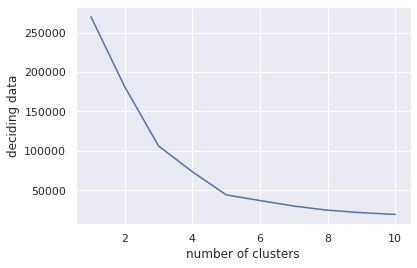

In [61]:
#ploting an elbowgraph to see clueter with minimum value

sns.set()
plt.plot(range(1,11),Cluster)
plt.title= 'elbow point graph'
plt.xlabel('number of clusters')
plt.ylabel('deciding data')
plt.show

In [62]:
#from our graph, the number of cluster we'll pick is 5
#because it is the number after which their is no significant drop in the graph 


Weve got 5 clusters 0,1,2,3,4

Training our kmeans clusters

In [63]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each datapoint based on clusters 
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing our clusters

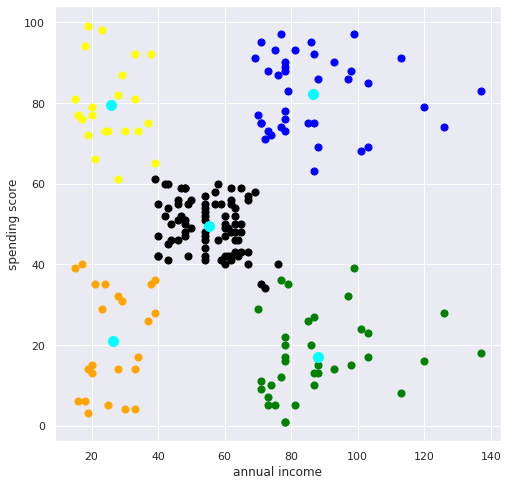

In [65]:
#plotting all the clusters and their centriods 

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label ='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='black', label ='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label ='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label ='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label ='Cluster 5')


#this up is to plot the clusters

#now to plot the centriods 

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')


plt.title=('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()


we can see the five main clusters,the spending score and the annual income of the individuals that come around to the mall.

we see the high earners and high spenders,
the high earners and low earners 
the low earners and high spenders
the low earners and low spenders 
the medium earners and medium spenders 